<a href="https://colab.research.google.com/github/Jayaaa508/sentiment-analysis/blob/main/prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
ls


raw.csv  sample_data/


In [4]:
import pandas as pd

file_path = 'raw.csv'
df = pd.read_csv(file_path)

In [10]:

import pandas as pd
import re
from textblob import TextBlob

# Function to clean the comments
def clean_comment(text):
    if not isinstance(text, str):
        return ''  # Return an empty string if the input is not a string
    # Remove URLs
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters, emojis, and excessive whitespace
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Function to determine the sentiment of a text
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Classify as positive, negative, or neutral
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'



# Clean the texts
df['comment'] = df['text'].apply(clean_comment)

# Analyze sentiment
df['sentiment'] = df['comment'].apply(analyze_sentiment)

# Select the required columns
cleandf = df[['text', 'comment', 'sentiment']]

# Save the processed data to a new CSV file
cleandf.to_csv('clean.csv', index=False)

In [11]:
# Check for missing values
print(df.isnull().sum())
# Dropping null values
df = df.dropna()

author          0
published_at    4
updated_at      4
like_count      4
text            4
comment         0
sentiment       0
dtype: int64


In [12]:

# Remove duplicate rows
df = df.drop_duplicates()

In [14]:
df.head()

,author,published_at,updated_at,like_count,text,comment,sentiment
0,@ChristinaK-r6n,2024-06-27T02:37:18Z,2024-06-27T02:37:18Z,0.0,thank you for putting this together it was sup...,Thank you for putting this together It was sup...,positive
1,@saloni1148,2024-06-16T07:59:19Z,2024-06-16T07:59:19Z,0.0,can i do this project on google colab,can i do this project on google colab,neutral
2,@bose19942,2024-06-05T23:27:56Z,2024-06-05T23:27:56Z,0.0,thank you for this video,Thank you for this video,neutral
3,@swarnimsrijan7470,2024-05-16T19:46:59Z,2024-05-16T19:46:59Z,0.0,what a brilliant lecture really impressed by y...,what a brilliant lecture Really impressed by y...,positive
4,@deepasinghal4729,2024-05-13T22:04:03Z,2024-05-13T22:04:03Z,0.0,followed till a href no error returned nothing,followed till 1814 no error returned nothing,neutral


In [15]:
!pip install nltk

In [16]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
# import libraries

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer




In [18]:
# create linguistic_preprocessing function
def linguistic_preprocessing(text):

    # Tokenize the text
    tokens = word_tokenize(text.lower())



    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

df['text'] = df['text'].apply(linguistic_preprocessing)
df.head()

,author,published_at,updated_at,like_count,text,comment,sentiment
0,@ChristinaK-r6n,2024-06-27T02:37:18Z,2024-06-27T02:37:18Z,0.0,thank you for putting this together it wa supe...,Thank you for putting this together It was sup...,positive
1,@saloni1148,2024-06-16T07:59:19Z,2024-06-16T07:59:19Z,0.0,can i do this project on google colab,can i do this project on google colab,neutral
2,@bose19942,2024-06-05T23:27:56Z,2024-06-05T23:27:56Z,0.0,thank you for this video,Thank you for this video,neutral
3,@swarnimsrijan7470,2024-05-16T19:46:59Z,2024-05-16T19:46:59Z,0.0,what a brilliant lecture really impressed by y...,what a brilliant lecture Really impressed by y...,positive
4,@deepasinghal4729,2024-05-13T22:04:03Z,2024-05-13T22:04:03Z,0.0,followed till a href no error returned nothing,followed till 1814 no error returned nothing,neutral


In [19]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [20]:
df.to_csv('preprossed.csv', index=False)

Data Visualization


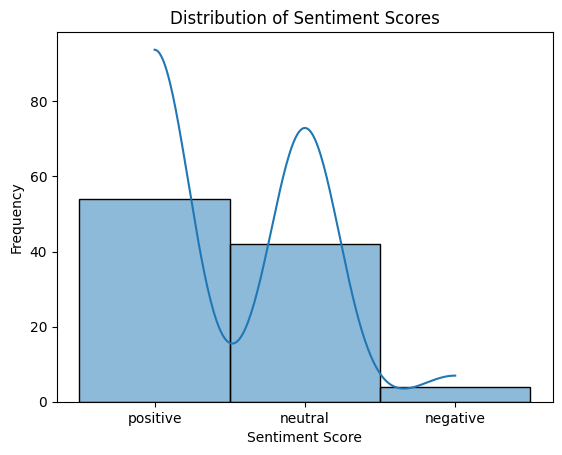

In [21]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Example of exploratory data analysis (EDA)
# Example: Distribution of sentiment scores
sentiment_scores = df['sentiment'].tolist()
sns.histplot(sentiment_scores, bins=10, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()




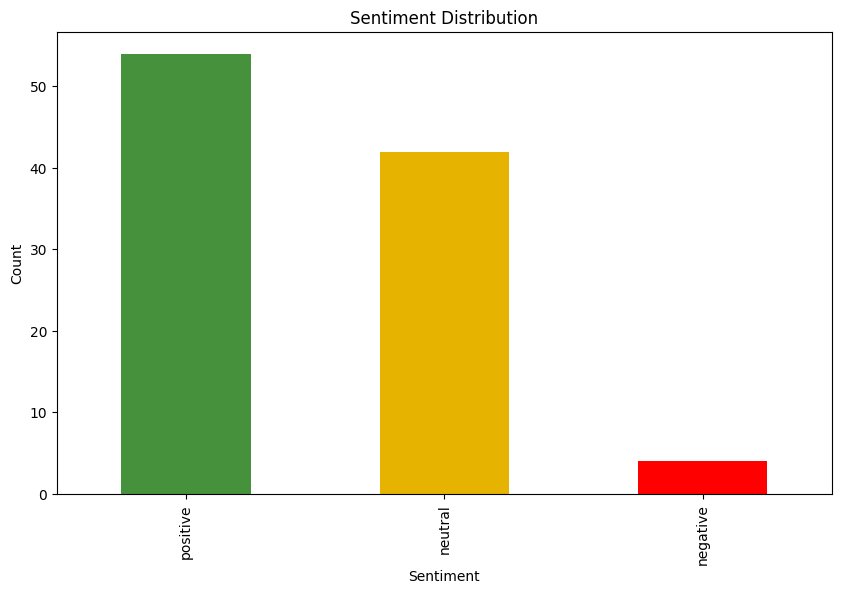

In [28]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=['#46923c', '#e6b400', '#ff0000'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [29]:
!pip install wordcloud

In [30]:
from wordcloud import WordCloud, STOPWORDS

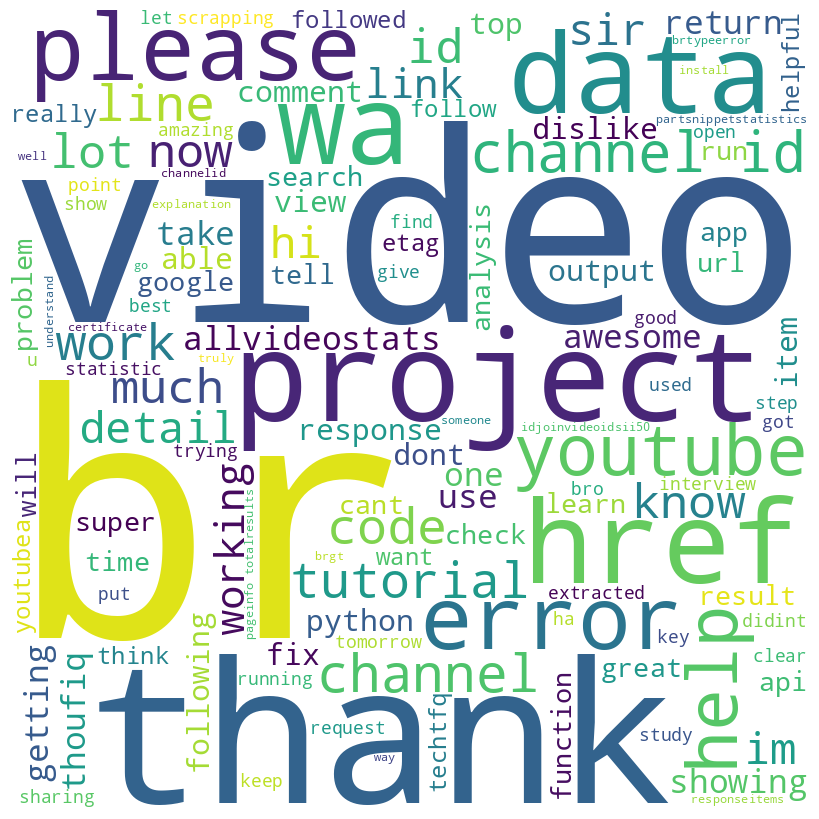

In [31]:

df = pd.read_csv("preprossed.csv", encoding ="latin-1")

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.text:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)


started training the model

In [33]:
!pip install spacy
!python -m spacy download en_core_web_lg
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 20.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [43]:
import spacy

nlp = spacy.load("en_core_web_lg")

In [44]:
def preprocess(text):
    # remove stop words and lemmatize the text
    if isinstance(text, float):
        text = str(text)
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

df['txt'] = df['comment'].apply(preprocess)

In [45]:
df['vector'] = df['txt'].apply(lambda x: nlp(x).vector)

In [46]:
df.head()

,author,published_at,updated_at,like_count,text,comment,sentiment,vector,txt
0,@ChristinaK-r6n,2024-06-27T02:37:18Z,2024-06-27T02:37:18Z,0.0,thank you for putting this together it wa supe...,Thank you for putting this together It was sup...,positive,"[0.7034775, -0.16752625, -2.98745, -1.024425, ...",thank put super helpful
1,@saloni1148,2024-06-16T07:59:19Z,2024-06-16T07:59:19Z,0.0,can i do this project on google colab,can i do this project on google colab,neutral,"[0.69540006, -0.5583323, 0.79903334, -1.80413,...",project google colab
2,@bose19942,2024-06-05T23:27:56Z,2024-06-05T23:27:56Z,0.0,thank you for this video,Thank you for this video,neutral,"[0.653155, -2.009645, -2.353595, -1.8163, 1.95...",thank video
3,@swarnimsrijan7470,2024-05-16T19:46:59Z,2024-05-16T19:46:59Z,0.0,what a brilliant lecture really impressed by y...,what a brilliant lecture Really impressed by y...,positive,"[0.75149995, -0.324797, -1.7737564, -1.4839115...",brilliant lecture impress sir thank help journey
4,@deepasinghal4729,2024-05-13T22:04:03Z,2024-05-13T22:04:03Z,0.0,followed till a href no error returned nothing,followed till 1814 no error returned nothing,neutral,"[-0.83943594, 0.1801401, 0.83916396, -0.672054...",follow till 1814 error return


In [47]:
x = df['vector']
y = df['sentiment']

In [48]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size= 0.3 , random_state = 0)

In [49]:
import numpy as np

X_train_2d = np.stack(x_train )
X_test_2d = np.stack( x_test)

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)

In [51]:

from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

MultinomialNB()

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(scaled_test_embed)

conf_matrix = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         2
     neutral       0.53      0.69      0.60        13
    positive       0.69      0.60      0.64        15

    accuracy                           0.60        30
   macro avg       0.41      0.43      0.41        30
weighted avg       0.58      0.60      0.58        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


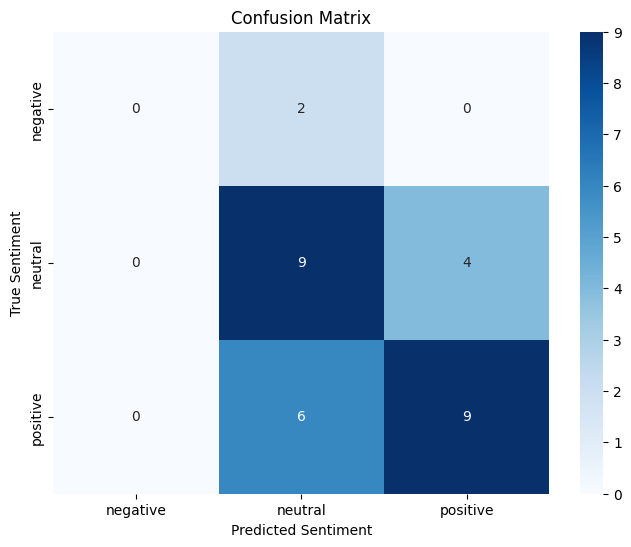

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.title('Confusion Matrix')
plt.show()


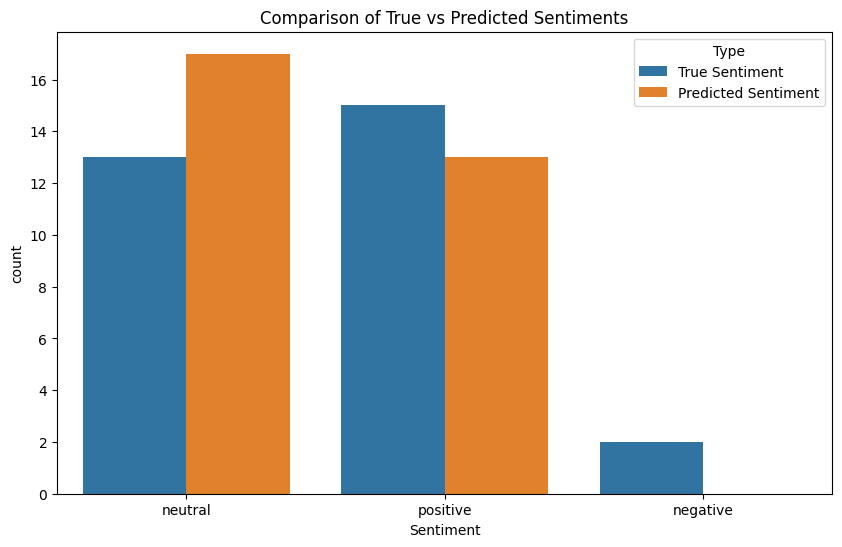

In [54]:
results_df = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred})
comparison_df = results_df.melt(var_name='Type', value_name='Sentiment')

plt.figure(figsize=(10, 6))
sns.countplot(data=comparison_df, x='Sentiment', hue='Type')
plt.title('Comparison of True vs Predicted Sentiments')
plt.show()

In [56]:
# How to save model
import pickle as pkl
file = open("m.pkl", "wb")
pkl.dump(clf, file )  # Swap the arguments here
file.close()